# Pandas 入門

Pandas はデータ操作によく用いられるパッケージであり、CSV などの一般的なデータ形式で保存されたデータの読み込みや、条件を指定しての一部データの抽出など、機械学習手法で取り扱うデータを整理するのに便利です。

今回は Pandas の以下の代表的な機能の使い方を説明します。

- CSV ファイルの読み書き
- 統計量の算出
- 並べ替え
- データの選択
- 条件指定による選択
- 欠損値の除去 / 補間
- ndarray とデータフレームを相互に変換
- グラフの描画

まず Pandas パッケージを読み込みましょう。
`pandas` は `pd` という別名を与えて用いるのが一般的です。

In [1]:
import pandas as pd

## CSV ファイルの読み書き

データセットは Google Colaboratory で用意されているサンプルデータを使用します。
Google Colaboratory 以外で実行する場合は、[こちら](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv)をダウンロードして、使用してください。



Pandas では CSV ファイルを読み込むための `pd.read_csv()` という関数が用意されています。
こちらを使って CSV ファイルを読み込みます。

In [2]:
# データセットの読み込み
df = pd.read_csv('sample_data/california_housing_train.csv')

`df` という変数名は、**データフレーム (data frame)** という Pandas で中心的に用いられる**データ構造 (data structure)** を表すクラスの名前の頭文字に由来しています。
`pd.read_csv()` 関数は、CSV ファイルの内容を `DataFrame` オブジェクトに読み込みます。

In [3]:
# 型の確認
type(df)

pandas.core.frame.DataFrame

## DataFrame の表示

`df` に読み込まれたデータの中身の確認してみましょう。
Jupyter Notebook 上では、大きな DataFrame を表示しようとすると自動的に一部が省略されることがあります。

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


## 先頭の数件だけを表示

データを数件のみ確認したい場合は、データフレームがもつ `df.head()` メソッドを使用します。
`df.head()` はデフォルトで先頭から 5 件のデータを表示しますが、`df.head(3)` のように引数に表示したいデータ件数を指定すると、指定された件数だけを表示することもできます。
それでは、`df.head()` を実行してみましょう。

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


特定の列を抽出したい場合は、`df` に対し、Python の辞書オブジェクトに行うように `[]` を使って取り出したい列の名前を指定します。

In [6]:
df['longitude'].head(3)

,longitude
0,-114.31
1,-114.47
2,-114.56


## CSV ファイルの保存

Pandas ではデータフレームオブジェクトの内容を CSV ファイルとして保存するための `df.to_csv()` というメソッドが用意されています。

In [7]:
df.to_csv('sample.csv')

In [8]:
!ls sample.csv

sample.csv


## データフレームの形

データフレームオブジェクトの行数と列数を確認するには、`df.shape()` メソッドを用います。

In [9]:
# 形の確認
df.shape

(17000, 9)

## 統計量の算出

データフレームには、中のデータに対し統計量を計算するためのメソッドも用意されています。
代表的なものを紹介します。

In [10]:
# 平均
df.mean()

,0
longitude,-119.562108
latitude,35.625225
housing_median_age,28.589353
total_rooms,2643.664412
total_bedrooms,539.410824
population,1429.573941
households,501.221941
median_income,3.883578
median_house_value,207300.912353


In [11]:
# 分散
df.var()

,0
longitude,4.020692e+00
latitude,4.568221e+00
housing_median_age,1.584310e+02
total_rooms,4.752169e+06
total_bedrooms,1.776618e+05
population,1.317566e+06
households,1.478563e+05
median_income,3.641061e+00
median_house_value,1.345223e+10


In [12]:
# 各列の None, NaN, NaT のいずれでもない値の数
df.count()

,0
longitude,17000
latitude,17000
housing_median_age,17000
total_rooms,17000
total_bedrooms,17000
population,17000
households,17000
median_income,17000
median_house_value,17000


ここで、データの特徴をおおまかに調べるために便利な `df.describe()` メソッドを実行してみましょう。

In [13]:
# データの概要
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


また、もうひとつ便利なメソッドに相関係数を算出する `df.corr()` があります。
入力変数間や入出力間の相関係数を確認することができます。

In [14]:
# 相関係数の算出
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


## 並べ替え

データフレームのある列を抽出し、`df.sort_values()` メソッドを呼び出すことで値の**並べ替え (sort)** を行うことができます。
なお、このメソッドは並べ替えが終わったあとの値でもとのデータフレーム内の値を置き換えることまでは行わず、結果を返します。
そこで、別の変数で結果を受け取り、始めの 5 行を表示することで並べ替えが行われたことを確認してみましょう。

`df.sort_values()` は、デフォルトでは**昇順 (ascending)** に並べ替えを行います。昇順とは、だんだん値が大きくなっていくように並べ替えるときの並べ方のことで、逆にだんだん値が小さくなっていくように並べ替えるときは、**降順 (descending)** に並べると言います。

`df.sort_values()` は並べ替えを行いたい列の名前を `by` という引数で受け取ります。また、デフォルトでは昇順に並べ替えを行います。

In [15]:
# total_rooms 列の値を昇順に並べ替え
df_as = df.sort_values(by='total_rooms')

In [16]:
df_as.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2990,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0
16309,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0
8188,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0
15369,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0
4502,-118.04,33.90,36.0,15.0,5.0,15.0,6.0,0.4999,162500.0


降順に並べ替える場合は、`ascending=False` という引数の指定を行います。

In [17]:
# total_rooms の列の値を降順に並べ替え
df_de = df.sort_values(by='total_rooms', ascending=False)

In [18]:
df_de.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0
2969,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0
8881,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,399200.0
1116,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,212300.0


## データの選択

着目したい要素や、行、列を選択する方法を紹介します。
[scikit-learn 入門](https://tutorials.chainer.org/ja/09_Introduction_to_Scikit-learn.html)の章で行ったように、入力値 `x` と目標値 `t` が別の列として同じ配列に格納されている場合は、指定した列だけを取り出す操作を行って、結果を別の変数に代入する操作を行います。
このように、特定の列の選択や列を範囲指定して選択する機能が Pandas のデータフレームにも用意されています。

今回は最後の列 `median_house_value` と、それ以外の列をそれぞれ取り出して、別々の変数に格納してみましょう。

列や行の選択を行う方法は複数あります。
ここでは、整数インデックスを用いてデータの部分選択を行う `df.iloc[]` を紹介します。

In [19]:
# データの確認
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [20]:
# df.iloc[行, 列]
# 0 行目 longitude 列の選択
df.iloc[0, 0]

np.float64(-114.31)

In [21]:
# 1 行目 latitude 列の選択
df.iloc[1, 1]

np.float64(34.4)

`iloc` には NumPy の ndarray の中の値を部分的に選択するのと同様のスライス表記を用いることができます。
負のインデックスを使い、末尾の要素からの個数を用いて位置指定を行うこともできます。

In [22]:
# すべての行の、最後の列を選択
t = df.iloc[:, -1]

In [23]:
# 先頭3件の表示
t.head(3)

,median_house_value
0,66900.0
1,80100.0
2,85700.0


In [24]:
# 型の確認
type(t)

pandas.core.series.Series

1 行だけ、もしくは 1 列だけ抽出した場合は、**シリーズ (series)** オブジェクトが返されます。

In [25]:
# すべての行の、先頭の列から末尾の列のひとつ手前までを選択
x = df.iloc[:, 0:-1]

In [26]:
# 先頭の3件の表示
x.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509


[NumPy 入門](08_Introduction_to_NumPy_ja.ipynb)で紹介したようなスライス記法を用いる際の先頭位置の省略も行えます。

In [27]:
# すべての行の、先頭の列から末尾の列のひとつ手前までを選択
x = df.iloc[:, :-1]

In [28]:
# 先頭の3件の表示
x.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509


行の数、列の数両方を複数選択した場合、データフレームオブジェクトが返ります。

In [29]:
# 型の確認
type(x)

pandas.core.frame.DataFrame

## 条件指定による要素の選択

次に値に対する条件を指定してデータの選択を行う方法を紹介します。

簡単のため、まず `median_house_value` 列を選択し、返ってきたシリーズオブジェクトに対して、比較演算子を使って**各要素に対する条件**を指定し、条件を満たすかどうかを全要素に対して調べた結果を取得してみましょう。

In [30]:
# median_house_value 列を選択し、全要素に対し 70000 より大きいかどうかを計算
mask = df['median_house_value'] > 70000

In [31]:
mask.head()

,median_house_value
0,False
1,True
2,True
3,True
4,False


このように、比較演算子の片方の辺にデータフレームやシリーズをおくと、指定された条件を満たすかどうかを全ての要素に対して計算することができます。
結果は、各要素が条件を満たすか、満たさないかを表す `True`、`False` が各要素の位置に格納されたデータフレームやシリーズとなります。
これを**マスク (mask)** と呼ぶことがあります。

そして、データフレームやシリーズも NumPy の ndarray と同様に、マスクを使って要素を選択することができます。
上の `mask` を `df` に `[]` を使って与えることで、指定した条件を満たす要素だけを取り出すことができます。

In [32]:
# df[mask] の先頭 5 件を表示
df[mask].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


### 複数の条件指定による要素の選択

複数の条件を組み合わせて要素を選択することも出来ます。
その場合は条件式を `()` でくくって用います。
**論理和 (or)** は `|`、**論理積 (and)** は `&` を用いて表します。

In [33]:
# 70000 より小さい または 80000 より大きい
mask2 = (df['median_house_value'] < 70000) | (df['median_house_value'] > 80000)

In [34]:
mask2.head()

,median_house_value
0,True
1,True
2,True
3,False
4,True


In [35]:
df[mask2].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


In [36]:
# 70000 より大きい かつ 80000 より小さい
mask3 = (df['median_house_value'] > 70000) & (df['median_house_value'] < 80000)

In [37]:
mask3.head()

,median_house_value
0,False
1,False
2,False
3,True
4,False


In [38]:
df[mask3].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
13,-114.61,34.83,31.0,2478.0,464.0,1346.0,479.0,3.2120,70400.0
23,-114.98,33.82,15.0,644.0,129.0,137.0,52.0,3.2097,71300.0
26,-115.37,32.82,30.0,1602.0,322.0,1130.0,335.0,3.5735,71100.0


条件に当てはまる要素を調べる操作と、条件に当てはまる要素の選択まで、1 行にまとめて書くこともできます。

In [39]:
df[(df['median_house_value'] > 70000) & (df['median_house_value'] < 80000)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
13,-114.61,34.83,31.0,2478.0,464.0,1346.0,479.0,3.2120,70400.0
23,-114.98,33.82,15.0,644.0,129.0,137.0,52.0,3.2097,71300.0
26,-115.37,32.82,30.0,1602.0,322.0,1130.0,335.0,3.5735,71100.0


### 条件指定による要素の置換

条件を指定して選択した要素に対し、値の書き換えを行うことができます。
例えば、`median_house_value` 列に対していくつかの条件を別々に調べ、それぞれの条件を満たしている場合に特定の値を持つような新しい列を `df` に追加してみます。
`median_house_value` が

- 60000 より小さい場合は 0
- 60000 以上 70000未満は 1
- 70000 以上 80000未満は 2
- 80000 以上は 3

となる値を持つ `target` という列を追加します。

まず、何も値の入っていない `target` という列を `df` に追加します。

In [40]:
# 新しい列 target を None で初期化
df['target'] = None

In [41]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,None
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,None
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,None
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,None
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,None


`target` という列の全ての要素は `None` となっています。
この値を、条件指定によって書き換えます。

まず各条件に対応するマスクを作成します。

In [42]:
mask1 = df['median_house_value'] < 60000
mask2 = (df['median_house_value'] >= 60000) & (df['median_house_value'] < 70000)
mask3 = (df['median_house_value'] >= 70000) & (df['median_house_value'] < 80000)
mask4 = df['median_house_value'] >= 80000

行や列を整数インデックスで選択する場合は `df.iloc[]` を使用しましたが、**列を名前で指定する**場合には `df.loc[]` を用います。
それでは、上で計算したマスクと名前による列指定を組み合わせて、各条件を満たす行の `target` 列の値を書き換えます。

In [43]:
df.loc[mask1, 'target'] = 0
df.loc[mask2, 'target'] = 1
df.loc[mask3, 'target'] = 2
df.loc[mask4, 'target'] = 3

結果を確認してみましょう。

In [44]:
# 先頭から 5 番目までを表示
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,2
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1


## 欠損値の除去・補間

欠損値を含むデータの場合、一部の行の値が欠損している列に `NaN` (Not a Number)、`None`、`NaT` (Not a Time) などが含まれる場合があります。
欠損値への対策としては、欠損値を含む行、または列を除去するか、欠損値を特定の値で補完するという方法が考えられます。

まずは、欠損値の除去の方法を紹介します。

In [45]:
# 欠損値を人為的に作成
df.iloc[0, 0] = None

In [46]:
# (0, 'longitude') の要素が NaN になっていることを確認
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
0,NaN,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3


In [47]:
# 欠損値のあるレコードを削除
df_dropna = df.dropna()

# 先頭から 3 件を表示
df_dropna.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,2


上の結果と見比べると、`NaN` を含んでいた 0 行目のデータが取り除かれていることが分かります。

次に、平均を使った欠損値の補完を行ってみましょう。
まずは、補完に使用する平均値の計算を行います。

In [48]:
mean = df.mean()
mean

,0
longitude,-119.562417
latitude,35.625225
housing_median_age,28.589353
total_rooms,2643.664412
total_bedrooms,539.410824
population,1429.573941
households,501.221941
median_income,3.883578
median_house_value,207300.912353
target,2.808412


計算した各列の値の平均が格納されている `mean` を、`df.fillna()` メソッドに渡すことで、`mean` を用いた欠損値の補完を行うことができます。

In [49]:
# 欠損値を mean で補完
df_fillna =  df.fillna(mean)

# 先頭から 3 件を表示
df_fillna.head(3)

/tmp/ipython-input-3851344383.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fillna =  df.fillna(mean)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
0,-119.562417,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1
1,-114.470000,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3
2,-114.560000,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3


0 行目のデータの `longitude` 列に、`mean` の `longitude` 行の値が表示されていることが分かります。

今回は欠損値が 1 箇所にだけあるデータを用いましたが、`df.dropna()` や `df.fillna()` は、対象の全ての欠損値に対して上記のような操作を行うメソッドです。

## ndarray とデータフレームを相互に変換

scikit-learn では、データフレームやシリーズをそのまま扱うことができます。
しかし、Chainer を含む他のライブラリやフレームワークではそのままでは扱うことができない場合もあります。
そこで、データフレームを NumPy の ndarray に変換する方法を紹介します。

まず、`df` がデータフレームであることを確認します。

In [50]:
type(df)

pandas.core.frame.DataFrame

次に、`df` の `values` という属性の型を調べてみます。

In [51]:
type(df.values)

numpy.ndarray

NumPy の ndarray になっています。
データフレームやシリーズは、`values` という属性に値を ndarray として格納しています。

In [52]:
df.values

array([[nan, 34.19, 15.0, ..., 1.4936, 66900.0, 1],
       [-114.47, 34.4, 19.0, ..., 1.82, 80100.0, 3],
       [-114.56, 33.69, 17.0, ..., 1.6509, 85700.0, 3],
       ...,
       [-124.3, 41.84, 17.0, ..., 3.0313, 103600.0, 3],
       [-124.3, 41.8, 19.0, ..., 1.9797, 85800.0, 3],
       [-124.35, 40.54, 52.0, ..., 3.0147, 94600.0, 3]], dtype=object)

In [54]:
type(df['longitude'])

pandas.core.series.Series

In [55]:
type(df['longitude'].values)

numpy.ndarray

逆に、Python のリストや ndarray からシリーズやデータフレームを作ることもできます。
NumPy で乱数を要素にもつ ndarray を生成し、これをデータフレームに変換してみましょう。

`pd.DataFrame` のインスタンス化の際に、`data` 引数に元にしたい ndarray を与えます。

In [56]:
import numpy as np

# ndarray -> pd.DataFrame
df = pd.DataFrame(
    data=np.random.randn(10, 10)
)

df

,0,1,2,3,4,5,6,7,8,9
0,0.486327,0.037973,-0.544884,-1.677255,0.510867,-0.330759,1.113842,0.391212,-1.112426,-1.229912
1,-0.735443,0.131841,0.123087,0.384203,-1.215273,1.120922,-0.301968,0.088043,0.345130,0.349818
2,1.187038,0.191300,0.111125,0.625127,-0.874378,0.773102,0.530161,-1.882416,1.249662,1.570208
3,0.303892,2.119691,1.219045,-0.697373,-0.638413,-0.834043,0.410030,-1.582335,-1.028624,0.951699
4,0.348277,0.916881,0.254522,0.571536,0.248441,1.654521,-0.516614,-0.419395,-0.893937,0.853090
5,-1.206059,0.871438,-0.285180,0.340832,1.059192,1.779834,0.744344,-0.623741,-0.007973,-0.581434
6,0.493480,-1.200261,1.255102,0.099006,0.653858,-0.541191,0.544127,-0.146762,-0.095676,1.318143
7,-0.081195,-1.313953,1.084465,-0.511196,2.000992,-1.071542,-0.230177,1.597321,1.508751,2.360645
8,-0.617292,-0.653055,0.350611,0.853540,1.032903,-0.009778,0.689950,0.150711,-1.293566,1.059117
9,0.318834,-1.293869,-0.036417,0.214537,0.104092,0.546370,0.384349,-1.205102,1.252514,-0.473504


## グラフの描画

データフレームオブジェクトから直接可視化のための機能を呼び出すことができます。
[次の章](https://tutorials.chainer.org/ja/12_Introduction_to_Matplotlib.html)で紹介する Matplotlib というグラフ描画ライブラリを `df.plot()` 機能を用いて利用することができます。

<Axes: >

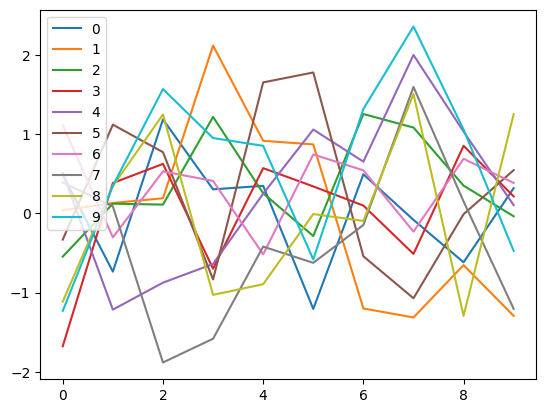

In [57]:
# グラフの描画
df.plot()

Matplotlib の使い方は、次章で説明します。